In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

print("packs loaded")

packs loaded


In [3]:
# ssl 错误改正
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
# 使用input_data 来下载这个数据集
print("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print("type of 'mnist' is %s" % (type(mnist)))
print("number of train data is %d" % (mnist.train.num_examples))
print("number of test data is %d" % (mnist.test.num_examples))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
type of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
number of train data is 55000
number of test data is 10000


In [4]:
# 数据集中 train数据集有55000张 test数据集有10000张数据

In [7]:
# 将数据进行切分
print("What does the data of MNIST look like?")
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
print("type of trainimg is %s" % (type(trainimg)))
print("type of trainlabel is %s" % (type(trainlabel)))
print("type of testimg is %s" % (type(testimg)))
print("type of testlabel is %s" % (type(testlabel)))
print("shape of trainimg is %s" % (trainimg.shape,))
print("shape of trainlabel is %s" % (trainlabel.shape,))
print("shape of testimg is %s" % (testimg.shape,))
print("shape of testlabel is %s" % (testlabel.shape,))

What does the data of MNIST look like?
type of trainimg is <class 'numpy.ndarray'>
type of trainlabel is <class 'numpy.ndarray'>
type of testimg is <class 'numpy.ndarray'>
type of testlabel is <class 'numpy.ndarray'>
shape of trainimg is (55000, 784)
shape of trainlabel is (55000, 10)
shape of testimg is (10000, 784)
shape of testlabel is (10000, 10)


how does the training data look like?
52278th Training Data Label is 3


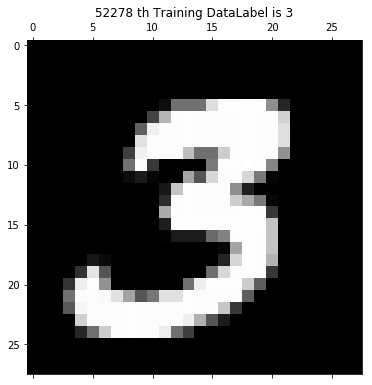

20163th Training Data Label is 1


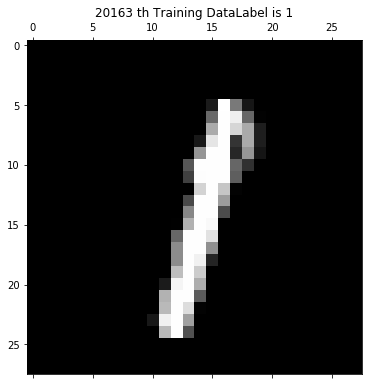

590th Training Data Label is 4


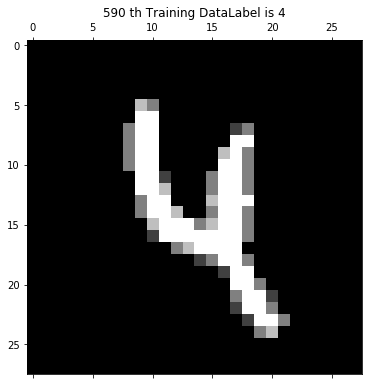

47190th Training Data Label is 5


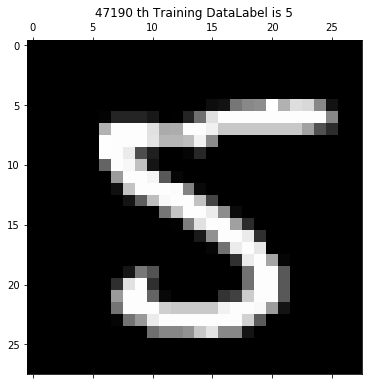

22636th Training Data Label is 8


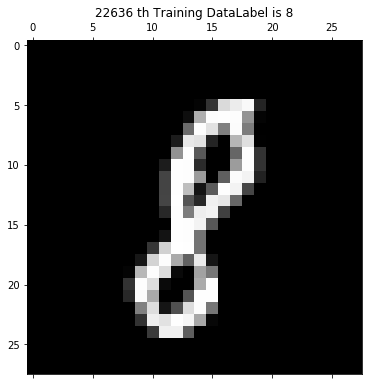

In [13]:
print("how does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img = np.reshape(trainimg[i,:], (28,28))
    curr_label = np.argmax(trainlabel[i,:])
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title(""+str(i) + " th Training Data" + "Label is "+ str(curr_label))
    print(""+str(i) + "th Training Data "+ "Label is "+ str(curr_label))
    plt.rcParams['figure.figsize'] =(8,6) # 设置图片尺寸
    plt.show()

In [14]:
# Batch Size
print("Batch learning")
batch_size =100 # 这里一般指定的是 2的n次幂
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print("type of batch_xs is %s" % (type(batch_xs)))
print("type of batch_ys is %s" % (type(batch_ys)))
print("shape of batch_xs is %s" % (batch_xs.shape,))
print("shape of batch_ys is %s" % (batch_ys.shape,))

Batch learning
type of batch_xs is <class 'numpy.ndarray'>
type of batch_ys is <class 'numpy.ndarray'>
shape of batch_xs is (100, 784)
shape of batch_ys is (100, 10)


In [15]:
print(trainlabel[0])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


# 逻辑回归

In [16]:
x = tf.placeholder("float",[None, 784])
y = tf.placeholder("float",[None, 10])

# 对权重进行初始化
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

actv = tf.nn.softmax(tf.matmul(x,W) + b) # 将逻辑回归的二分类任务转换成多分类任务
# 定义损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv), reduction_indices=1))

# 定义优化器
learning_rate = 0.01
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [19]:
## TensorFlow相关知识点
sess = tf.InteractiveSession()
arr = np.array([[31,23, 4,24,27,34],
                [18, 3,25, 0, 6,35],
                [28,14,33,22,20, 8],
                [13,30,21,19, 7, 9],
                [16, 1,26,32, 2,29],
                [17,12, 5,11,10,15]])
print(tf.rank(arr).eval())  # 输出tensor的维度
print(tf.shape(arr).eval())   # 输出tensor各个维度的尺寸
print(tf.argmax(arr, 0).eval())  # 输出的是在第一个维度（列）上最大值的索引
print(tf.argmax(arr, 1).eval())  # 输出的是在第一个维度（行）上最大值的索引

2
[6 6]
[0 3 2 4 0 1]
[5 5 2 1 3 0]


In [20]:
# 定义了一个预测函数
pred = tf.equal(tf.argmax(actv,1), tf.argmax(y,1)) #观察预测值和真实值是否一致
# 预测的准确度
accr = tf.reduce_mean(tf.cast(pred,"float")) # tf.cast将true和false转换成0 1 然后求取平均值

init = tf.global_variables_initializer()

In [21]:
training_epochs= 50
batch_size = 100
display_step = 5
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    avg_cost = 0
    num_batch = int(mnist.train.num_examples/batch_size)
    for i in range(num_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={x:batch_xs, y:batch_ys})
        feeds = {x:batch_xs, y:batch_ys}
        avg_cost += sess.run(cost, feed_dict=feeds)/num_batch
    # display  
    if epoch % display_step == 0:
        feeds_train = {x:batch_xs, y:batch_ys}
        feeds_test = {x:mnist.test.images, y:mnist.test.labels}
        
        train_acc = sess.run(accr, feed_dict=feeds_train)
        test_acc = sess.run(accr,feed_dict=feeds_test)
        print("Epoch: %03d/%03d cost: %.9f train_acc: % .3f test_acc: %.3f" % (epoch, training_epochs, avg_cost, train_acc,test_acc))

print("DONE!")

Epoch: 000/050 cost: 1.176352865 train_acc:  0.920 test_acc: 0.852
Epoch: 005/050 cost: 0.440958260 train_acc:  0.880 test_acc: 0.896
Epoch: 010/050 cost: 0.383281432 train_acc:  0.890 test_acc: 0.905
Epoch: 015/050 cost: 0.357333688 train_acc:  0.920 test_acc: 0.909
Epoch: 020/050 cost: 0.341502325 train_acc:  0.920 test_acc: 0.912
Epoch: 025/050 cost: 0.330335568 train_acc:  0.910 test_acc: 0.914
Epoch: 030/050 cost: 0.322568747 train_acc:  0.870 test_acc: 0.916
Epoch: 035/050 cost: 0.315994077 train_acc:  0.910 test_acc: 0.917
Epoch: 040/050 cost: 0.310764797 train_acc:  0.930 test_acc: 0.917
Epoch: 045/050 cost: 0.306686919 train_acc:  0.900 test_acc: 0.918
DONE!
